# CA04-Ensemble Methods

## Part 1: Data Source and Contents
The dataset is obtained from the Census Bureau and represents salaries of people along
with seven demographic variables. The following is a description of our dataset:
- Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]
- Number of attributes (Columns): 7, 11*
- Number of instances (Rows): 48,842

### For this part we will be importing everything from CA03

In [1]:
# Importing Libraries for EDA/ Data Quality Report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Loading the Data
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
# Printing a few rows
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
# Using info for more detailed info information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


### Cleaning and Transforming

In [5]:
#Eliminating irrelavant characters in DataFrame ( like b.,c., that appears before the values in most of the columns)
for col in df.drop(columns = ["flag","y"]): # "Flag" and "y" do not need any cleaning on this aspect
    df[col] = df[col].str.split(".", n=1, expand = True)[1]

In [6]:
#Checking if worked
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [7]:
# Encoding using Label Encoding (From Python Refresher!)
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder object
le = LabelEncoder()

# Iterate over each column in the original DataFrame
for col in df.columns:
    # Fit and transform the encoder on the column values
    encoded_values = le.fit_transform(df[col])
    # Replace the original column with the encoded values
    df[col] = encoded_values

# Checking the new DataFrame
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,3,2,2,0,1,0,0,3,1,0
1,0,0,0,1,0,1,0,0,4,1,0
2,1,1,2,1,0,4,4,0,3,1,0
3,1,1,0,1,2,0,2,0,4,1,0
4,1,0,0,1,1,1,0,0,1,1,0


### Splitting the Data

In [8]:
# Before running the model we must split our data into train and test data
# Based on our dataset we will use the variable "flag"
# Where after encoding 1 represents train and 0 represents test

df_train = df[df['flag'] == 1]
df_test = df[df['flag'] == 0]

In [9]:
# The next step is to separate features and labels (target variables)
# To learn the relationship between the input features and the target variable
# We will also drop 'flag' because its purpose was to split the data, from now on it could affect our model if we use it.

# Train Data
x_train = df_train.drop(['y','flag'], axis=1) 
y_train = df_train['y']

# Test data
x_test = df_test.drop(['y','flag'], axis=1)
y_test = df_test['y']

## Part 2: Finding Optimal Value of a key Ensemble Method Hyper-parameter

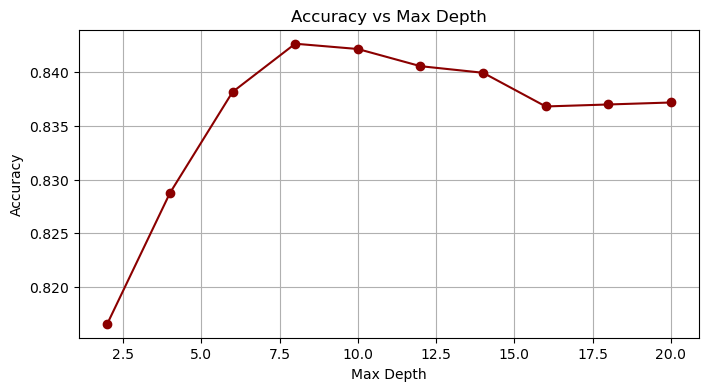

In [18]:
from sklearn.tree import DecisionTreeClassifier

results = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize=(8, 4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')
plt.grid(True)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

## Part 3 :Building a Random Forest Model

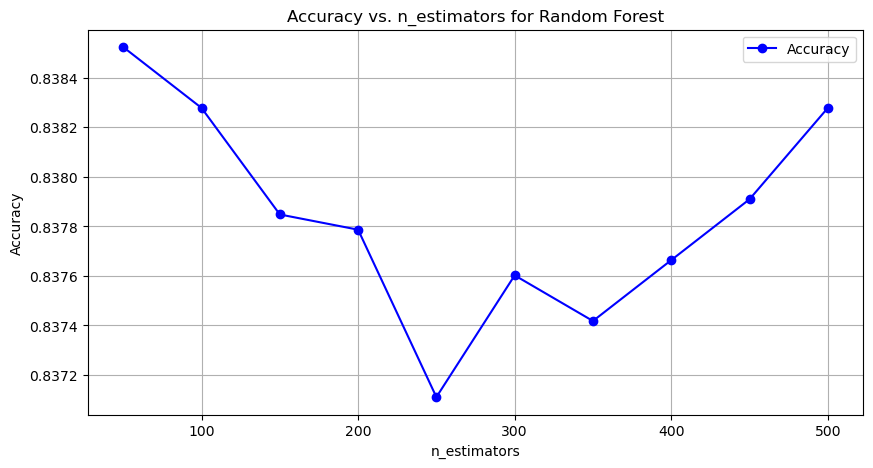

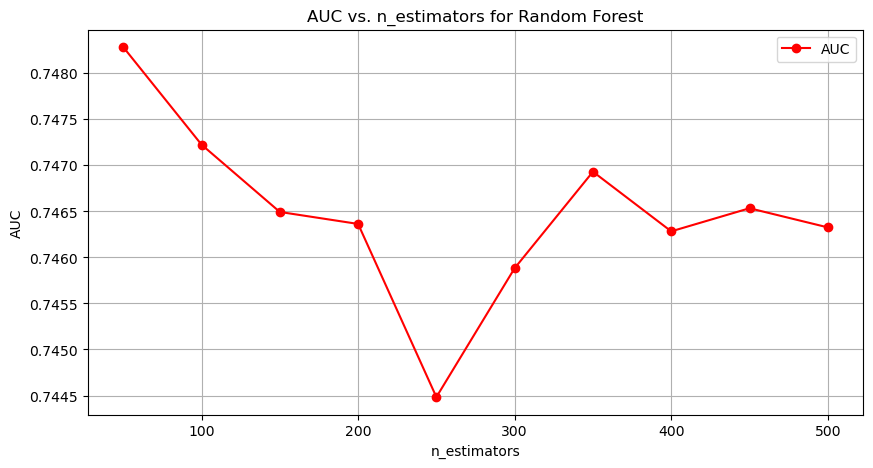

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store accuracy and AUC scores
accuracy_scores_rf = []
auc_scores_rf = []

# Train RandomForestClassifier models with different n_estimators values
for n_estimators in n_estimators_values:
    clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    clf_rf.fit(x_train, y_train)
    y_pred_rf = clf_rf.predict(x_test)
    
    # Calculate accuracy and AUC scores
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    auc_rf = roc_auc_score(y_test, y_pred_rf)
    
    # Append the scores to the respective lists
    accuracy_scores_rf.append(accuracy_rf)
    auc_scores_rf.append(auc_rf)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracy_scores_rf, color='blue', marker='o', label='Accuracy')
plt.title('Accuracy vs. n_estimators for Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, auc_scores_rf, color='red', marker='o', label='AUC')
plt.title('AUC vs. n_estimators for Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


#### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- The classifier exhibits its best performance with fewer estimators initially, gradually decreasing in performance as the number of estimators increases until reaching 150. Beyond this point, performance improves again, although it does not reach the same level as the beginning, but maybe if we increase our range even more we might find a more optimal number
#### 2. Is there an optimal value of the estimator within the given range?
- It could be 50, but considering that accuracy appears to increase after 500, our optimal value for this classifier might not fall within this range

## Part 4: AdaBoost, Gradient Boost & XGB

### AdaBoost

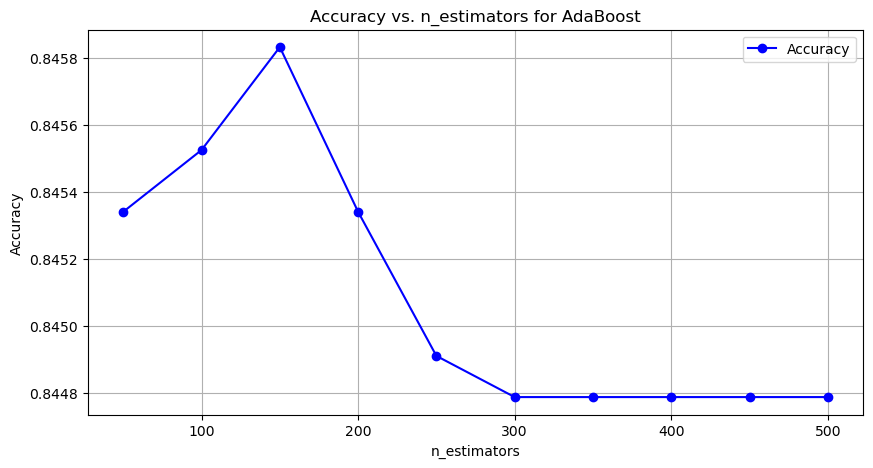

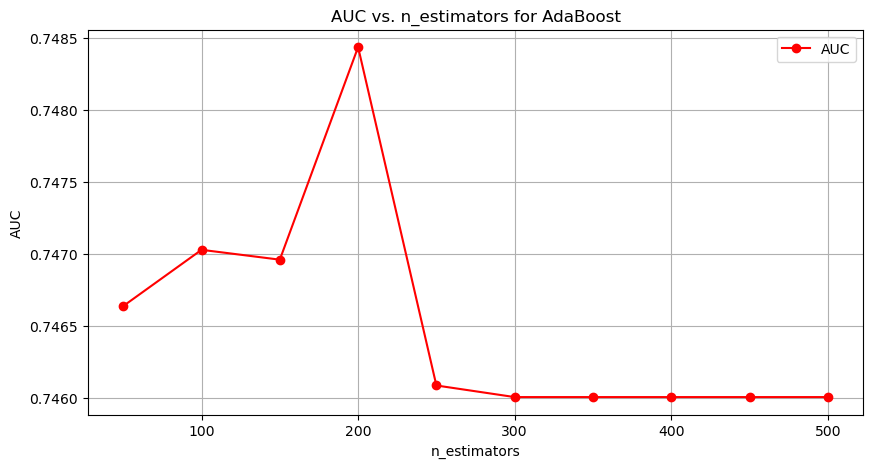

In [11]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store accuracy and AUC scores
accuracy_scores_adaboost = []
auc_scores_adaboost = []

# Train AdaBoostClassifier models with different n_estimators values
for n_estimators in n_estimators_values:
    clf_adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=101)
    clf_adaboost.fit(x_train, y_train)
    y_pred_adaboost = clf_adaboost.predict(x_test)
    
    # Calculate accuracy and AUC scores
    accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
    auc_adaboost = roc_auc_score(y_test, y_pred_adaboost)
    
    # Append the scores to the respective lists
    accuracy_scores_adaboost.append(accuracy_adaboost)
    auc_scores_adaboost.append(auc_adaboost)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracy_scores_adaboost, color='blue', marker='o', label='Accuracy')
plt.title('Accuracy vs. n_estimators for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, auc_scores_adaboost, color='red', marker='o', label='AUC')
plt.title('AUC vs. n_estimators for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


#### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- Both metrics reach their peak performance significantly early, followed by a sharp drop in performance with the next increase in estimators. However, performance remains unchanged as we further increase the number of estimators, indicating that we have found an optimal estimator
#### 2. Is there an optimal value of the estimator within the given range?
- Yes, with 200 estimators, we achieve the best trade-off between AUC and accuracy.

### Gradient Boost

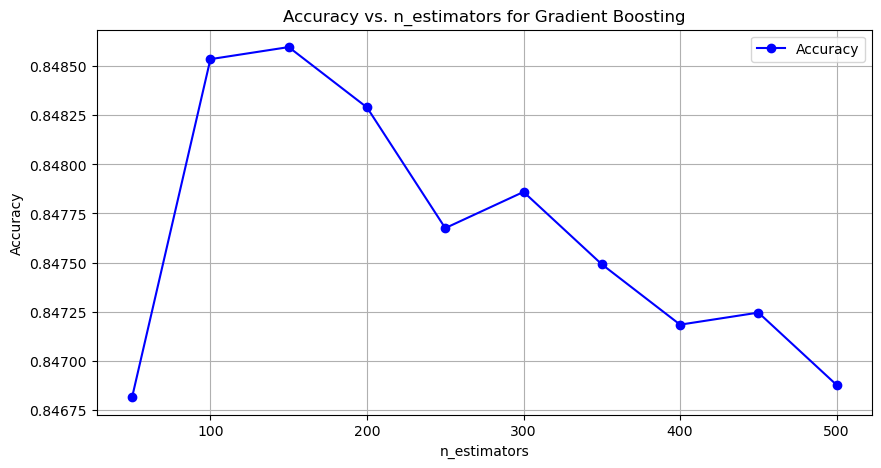

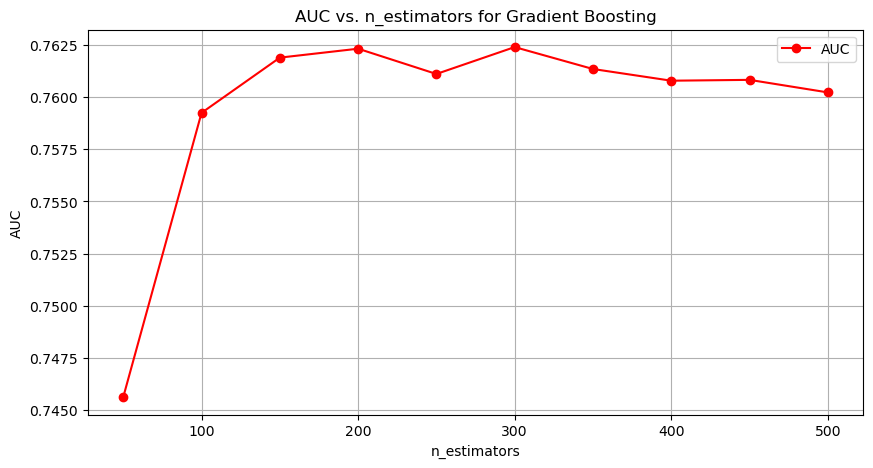

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store accuracy and AUC scores
accuracy_scores_gb = []
auc_scores_gb = []

# Train GradientBoostingClassifier models with different n_estimators values
for n_estimators in n_estimators_values:
    clf_gb = GradientBoostingClassifier(n_estimators=n_estimators, random_state=101)
    clf_gb.fit(x_train, y_train)
    y_pred_gb = clf_gb.predict(x_test)
    
    # Calculate accuracy and AUC scores
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    auc_gb = roc_auc_score(y_test, y_pred_gb)
    
    # Append the scores to the respective lists
    accuracy_scores_gb.append(accuracy_gb)
    auc_scores_gb.append(auc_gb)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracy_scores_gb, color='blue', marker='o', label='Accuracy')
plt.title('Accuracy vs. n_estimators for Gradient Boosting')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, auc_scores_gb, color='red', marker='o', label='AUC')
plt.title('AUC vs. n_estimators for Gradient Boosting')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


#### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- Both metrics start off with poor performance at 50 estimators but show significant improvement after reaching 100. However, accuracy experiences a sharp decline after 150, while AUC remains relatively stable with minor fluctuations
#### 2. Is there an optimal value of the estimator within the given range?
- Yes, 150.After 150 estimators, we observe a significant decrease in accuracy, while AUC remains stable

### XGB Classifier

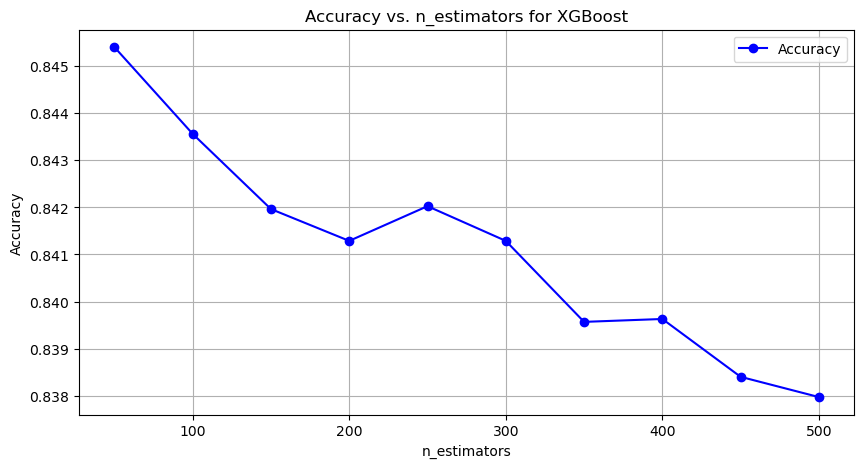

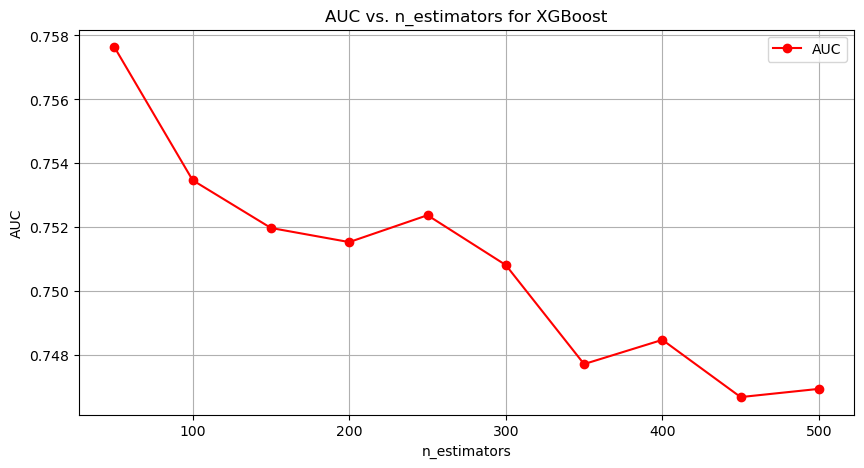

In [13]:
import xgboost as xgb

n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store accuracy and AUC scores
accuracy_scores_xgb = []
auc_scores_xgb = []

# Train XGBClassifier models with different n_estimators values
for n_estimators in n_estimators_values:
    clf_xgb = xgb.XGBClassifier(n_estimators=n_estimators, random_state=101)
    clf_xgb.fit(x_train, y_train)
    y_pred_xgb = clf_xgb.predict(x_test)
    
    # Calculate accuracy and AUC scores
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    auc_xgb = roc_auc_score(y_test, y_pred_xgb)
    
    # Append the scores to the respective lists
    accuracy_scores_xgb.append(accuracy_xgb)
    auc_scores_xgb.append(auc_xgb)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracy_scores_xgb, color='blue', marker='o', label='Accuracy')
plt.title('Accuracy vs. n_estimators for XGBoost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, auc_scores_xgb, color='red', marker='o', label='AUC')
plt.title('AUC vs. n_estimators for XGBoost')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


#### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- Both metrics exhibit almost identical plots, with performance peaking initially with fewer estimators and then gradually declining.
#### 2. Is there an optimal value of the estimator within the given range?
- Yes, at 50 estimators, both AUC and accuracy reach their peak.

## Part 5: Compare Performance

In [14]:
data = {
    'Random Forest': [max(accuracy_scores_rf), max(auc_scores_rf)],
    'AdaBoost': [max(accuracy_scores_adaboost), max(auc_scores_adaboost)],
    'Gradient Boost': [max(accuracy_scores_gb), max(auc_scores_gb)],
    'XGBoost': [max(accuracy_scores_xgb), max(auc_scores_xgb)]
}

# Create the DataFrame
df_compare = pd.DataFrame(data, index=['Accuracy', 'AUC'])
df_compare


,Random Forest,AdaBoost,Gradient Boost,XGBoost
Accuracy,0.838523,0.845833,0.848597,0.845403
AUC,0.748282,0.748435,0.762385,0.757634
